In [64]:
#!pip install pyshp
import shapefile
import geopandas as gpd
import pandas as pd

### Polygon 1 

In [244]:
# Create a polygon shapefile
w = shapefile.Writer('shapefiles/test/polygon1')
w.field('name', 'C')
w.poly([[[0.00, -285.00],[39.76, -285.00],[39.76, -259.00],[0.00, -259.00]]])
w.record('polygon1')
w.close()

### Polygon 12, simmetry with polygon 1 

In [245]:
w = shapefile.Writer('shapefiles/test/polygon12')
w.field('name', 'C')
w.poly([[[0.00, 0.00],[0.00, -26.00],[39.76, -26.00],[39.76, 0.00]]])
w.record('polygon12')
w.close()

### Polygon 2

In [246]:
w = shapefile.Writer('shapefiles/test/polygon2')
w.field('name', 'C')
w.poly([[[63.23, -185.14],[0, -185.14],[0, -259],[39.76, -259.00],[49.04, -258.50],[55, -257.7],[63.78, -257],[68.24, -256.05]]])
w.record('polygon2')
w.close()

### Polygon 11, simmetry with Polygon 2 TODO

In [247]:
w = shapefile.Writer('shapefiles/test/polygon11')
w.field('name', 'C')
w.poly([[[0, -26.40],[0, -100.36],[63.23, -100.36],[68.30, -30.35],[63.23, -28.85],[61.65, -28.45],[59, -28.30],[52.36, -27.20],[49.66, -26.80],[44.28, -26.55],[39.76, -26.40]]])
w.record('polygon11')
w.close()

### Polygon 3

In [248]:
w = shapefile.Writer('shapefiles/test/polygon3')
w.field('name', 'C')
w.poly([[[39.76, -285.00],[200, -285],[200, -236.28],[105.26, -236.28],[101.32, -240.50],[97.37, -243],[85.25, -249.3],[77.98, -252],[68.24, -256.05],[63.78, -257],[55, -257.7],[49.04, -258.50],[39.76, -259.00]]])
w.record('polygon3')
w.close()

### Polygon 10, simmetry with polygon 3

In [249]:
w = shapefile.Writer('shapefiles/test/polygon10')
w.field('name', 'C')
w.poly([[[39.76, 0],[200, 0],[200, -48.40],[105.26, -48.40],[100.50, -44.90],[96.32, -42],[90.10, -38.50],[84,-35.30],[80.01, -34.30],[76.84, -33.2],[71.91, -31.93],[68.30, -30.35],[63.23, -28.85],[61.65, -28.45],[59, -28.30],[52.36, -27.20],[49.66, -26.80],[44.28, -26.55],[39.76, -26.40]]])
w.record('polygon10')
w.close()

### Polygon 7

In [250]:
w = shapefile.Writer('shapefiles/test/polygon6')
w.field('name', 'C')
w.poly([[[0.00, -100.36],[0.00, -141.25],[100.97, -141.25],[100.97, -100.36]]])
w.record('polygon6')
w.close()

### Polygon 6, simmetry with polygon 7

In [251]:
w = shapefile.Writer('shapefiles/test/polygon7')
w.field('name', 'C')
w.poly([[[0.00, -141.25],[0.00, -185.14],[100.97, -185.14],[100.97, -141.25]]])
w.record('polygon7')
w.close()

### Polygon 4

In [270]:
w = shapefile.Writer('shapefiles/test/polygon4')
w.field('name', 'C')
w.poly([[[63.23, -185.14],[100.97, -185.14],[100.97, -141.25],[149.50, -141.25],[143.31,-174.86],[139.74, -187.18],[137.64, -195.36],[132.89, -203.81],[129.53, -209.85],[126.79, -214.55],,[122.49, -220],[116.21, -226.41],[110.31, -231.61],[105.26, -236.28],[101.32, -240.50],[97.37, -243],[85.25, -249.3],[77.98, -252],[68.24, -256.05]]])
w.record('polygon4')
w.close()

### Polygon 9, simmetry with polygon 4 DOING THIS

In [ ]:
w = shapefile.Writer('shapefiles/test/polygon7')
w.field('name', 'C')
w.poly([[[149.50, -141.25],[100.97, -141.25],[100.97, -100.36],[63.23, -100.36],[68.30, -30.35],[71.91, -31.93],[76.84, -33.2],[80.01, -34.30],[84,-35.30],[90.10, -38.50],[96.32, -42],[100.50, -44.90],[105.26, -48.40],[114.51,-60.46],[141.15,-100.73],                                                                         ]])
w.record('polygon7')
w.close()

### Polygon 5 

In [272]:
w = shapefile.Writer('shapefiles/test/polygon5')
w.field('name', 'C')
w.poly([[[149.50, -141.25],[200, -141.25],[200, -236.28],[105.26, -236.28],[110.31, -231.61],[116.21, -226.41],[122.49, -220],[126.79, -214.55],[129.53, -209.85],[132.89, -203.81],[137.64, -195.36],[139.74, -187.18],[143.31,-174.86]]])
w.record('polygon5')
w.close()

### Polygon 8, simmetry with polygon 5

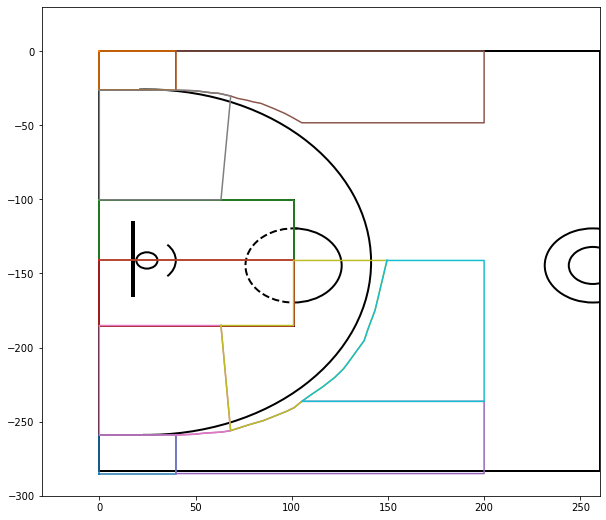

In [273]:
import matplotlib.pyplot as plt

sf1 = shapefile.Reader("./shapefiles/test/polygon1.shp")
sf12 = shapefile.Reader("./shapefiles/test/polygon12.shp")
sf6 = shapefile.Reader("./shapefiles/test/polygon6.shp")
sf7 = shapefile.Reader("./shapefiles/test/polygon7.shp")
sf3 = shapefile.Reader("./shapefiles/test/polygon3.shp")
sf10 = shapefile.Reader("./shapefiles/test/polygon10.shp")
sf2 = shapefile.Reader("./shapefiles/test/polygon2.shp")
sf11 = shapefile.Reader("./shapefiles/test/polygon11.shp")
sf4 = shapefile.Reader("./shapefiles/test/polygon4.shp")
sf5 = shapefile.Reader("./shapefiles/test/polygon5.shp")


plt.figure(60, figsize = (10,9))
draw_court(outer_lines=True)
plt.xlim(-30,260)
plt.ylim(-300,30)
for shape in sf1.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    
    y = [i[1] for i in shape.shape.points[:]]
    
    plt.plot(x,y)

for shape in sf12.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    
    y = [i[1] for i in shape.shape.points[:]]
    

    plt.plot(x,y)
    
for shape in sf6.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    
    y = [i[1] for i in shape.shape.points[:]]
    

    plt.plot(x,y)

for shape in sf7.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    
    y = [i[1] for i in shape.shape.points[:]]
    

    plt.plot(x,y)
    
for shape in sf3.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    
    y = [i[1] for i in shape.shape.points[:]]
    

    plt.plot(x,y)
    
for shape in sf10.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    
    y = [i[1] for i in shape.shape.points[:]]
    

    plt.plot(x,y)
       
for shape in sf2.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    
    y = [i[1] for i in shape.shape.points[:]]
    

    plt.plot(x,y)

for shape in sf11.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    
    y = [i[1] for i in shape.shape.points[:]]
    

    plt.plot(x,y)
    
for shape in sf4.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    
    y = [i[1] for i in shape.shape.points[:]]
    

    plt.plot(x,y)
    
for shape in sf5.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    
    y = [i[1] for i in shape.shape.points[:]]
    

    plt.plot(x,y)
    
    
    
    
    
    
plt.show()

In [50]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((24.75, -141.25), radius=5.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((17.25, -115.25), 1, -50, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((0, -100.36), 100.97, -84.78, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((100.97, -144.63), 50, 50, angle = 270, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((100.97, -144.63), 50, 50, angle = 85, theta1= 0, theta2=180,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((24.75, -141.25), 30, 30, angle = 315, theta1=0, theta2=90, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((0, -26), 30, 0, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((0, -259), 30, 0, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((24.75, -142.40), 233, 233, angle = 225, theta1=44, theta2=227, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((256.5, -144.63), 50, 50, theta1=360, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((256.5, -144.63), 25, 25, theta1=360, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((0, 0), 260, -283, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [70]:
tiros = pd.read_csv("database_shots.csv")

In [71]:
tiros.drop(columns = ["Unnamed: 0"], inplace = True)
tiros["coord_x"] = pd.to_numeric(tiros["coord_x"], downcast="float")
tiros["coord_y"] = pd.to_numeric(tiros["coord_y"], downcast="float")
tiros["coord_y"] = tiros["coord_y"] * (-1)

In [73]:
tiros_poly1 = tiros.loc[(tiros["coord_x"] < 40.00) & (tiros["coord_y"] < -258.00)]

In [80]:
gdf = gpd.GeoDataFrame(tiros_poly1, geometry = gpd.points_from_xy(tiros_poly1.coord_x, tiros_poly1.coord_y))
gdf.head()

,name,jornada,shot,coord_x,coord_y,geometry
45,J. Brown,2,#local-out,26.173653,-259.466675,POINT (26.174 -259.467)
61,R. Martínez,2,#local-out,33.329376,-259.466675,POINT (33.329 -259.467)
234,D. Brizuela,2,#local-out,37.974976,-260.383331,POINT (37.975 -260.383)
264,S. Vene,2,#local-in,24.750000,-259.466675,POINT (24.750 -259.467)
268,S. Vene,2,#local-out,24.750000,-259.899994,POINT (24.750 -259.900)


In [87]:
gdf1 = gpd.GeoDataFrame(tiros, geometry = gpd.points_from_xy(tiros.coord_x, tiros.coord_y))
gdf1.head()

,name,jornada,shot,coord_x,coord_y,geometry
0,J. Zyskowski,2,#local-in,24.750000,-126.416664,POINT (24.750 -126.417)
1,J. Zyskowski,2,#local-in,24.750000,-23.883333,POINT (24.750 -23.883)
2,J. Zyskowski,2,#local-out,25.705345,-23.883333,POINT (25.705 -23.883)
3,J. Zyskowski,2,#local-in,27.616035,-137.866669,POINT (27.616 -137.867)
4,J. Zyskowski,2,#local-in,27.128998,-129.816666,POINT (27.129 -129.817)


In [75]:
shapefile_data = gpd.read_file("polygon1.shp")

In [76]:
shapfile_raw = pd.DataFrame(shapefile_data)
shapfile_raw.head()

,name,geometry
0,polygon1,"POLYGON ((0.000 -285.000, 39.760 -285.000, 39...."


In [81]:
df_2 = gdf.merge(shapfile_raw)
df_2.head()

,name,jornada,shot,coord_x,coord_y,geometry


In [88]:
llego_papa = gpd.sjoin(shapefile_data, gdf1, how='inner', op='contains')

In [89]:
llego_papa

,name_left,geometry,index_right,name_right,jornada,shot,coord_x,coord_y
0,polygon1,"POLYGON ((0.000 -285.000, 39.760 -285.000, 39....",1108,D. Ennis,3,#local-out,39.492290,-262.016663
0,polygon1,"POLYGON ((0.000 -285.000, 39.760 -285.000, 39....",6470,T. Gielo,13,#local-out,39.511021,-260.733337
0,polygon1,"POLYGON ((0.000 -285.000, 39.760 -285.000, 39....",16840,G. Vives,3,#visitor-out,39.518677,-259.466675
0,polygon1,"POLYGON ((0.000 -285.000, 39.760 -285.000, 39....",24710,A. Doornekamp,17,#visitor-out,39.518677,-259.466675
0,polygon1,"POLYGON ((0.000 -285.000, 39.760 -285.000, 39....",17595,D. Seeley,5,#visitor-in,39.050385,-259.049988
...,...,...,...,...,...,...,...,...
0,polygon1,"POLYGON ((0.000 -285.000, 39.760 -285.000, 39....",14567,L. Meindl,27,#local-in,24.750000,-259.049988
0,polygon1,"POLYGON ((0.000 -285.000, 39.760 -285.000, 39....",11254,E. Vicedo,21,#local-out,24.750000,-259.049988
0,polygon1,"POLYGON ((0.000 -285.000, 39.760 -285.000, 39....",13179,J. Jenkins,25,#local-in,24.750000,-259.049988
0,polygon1,"POLYGON ((0.000 -285.000, 39.760 -285.000, 39....",2226,A. Brown,5,#local-out,24.750000,-259.049988


In [ ]:
plt.figure(figsize=(18,20))
draw_court(outer_lines=True)
plt.xlim(-30,260)
plt.ylim(-300,30)
sns.scatterplot(data = jaycee, x = "coord_x", y = "coord_y", s = 200, markers = {"#local-in": "s", "#local-out": "X"})
plt.show()